# Students Data set Analysis CE888


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras import metrics
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
%matplotlib inline

print("Importing Libraries is Done!")

Importing Libraries is Done!


In [40]:
# Read data from file 'filename.csv' 
dataset3 = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Datasets\\student\\student-por.csv")

# Preview the first 5 lines of the loaded data 
dataset3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Compute Missing or Null Data points

In [41]:
dataset3.isnull().sum()
dataset3.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [42]:
#check for missing variables
dataset3.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

### Convert the 17 categorical variables into numeric

In [43]:
# We have 17 objects thas mean that we have some categorical features
dataset3.get_dtype_counts()

int64     16
object    17
dtype: int64

In [44]:
#We firstly copy the y column 
ytarget=dataset3['G3'].copy()
#We drop out the y attribute
Correct_set= dataset3.drop(['G3'], axis=1)
Correct_set[Correct_set.select_dtypes(['object']).columns].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no


In [45]:
Correct_set.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13


In [46]:
#We can convert now the categorical data by using dummies
Correct_set_new = pd.get_dummies(Correct_set, columns=Correct_set.select_dtypes(['object']).columns)

print("The head of the training set is:")
Correct_set_new.head()

The head of the training set is:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [47]:
Correct_set_new.ix[:,0:30]

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,18,4,4,2,2,0,4,3,4,1,...,1,1,0,1,0,1,0,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,1,1,0,0,1,1,0,0,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,1,1,0,0,0,0
3,15,4,2,1,3,0,3,2,2,1,...,1,1,0,0,1,0,1,0,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,1,0,0,1,0,0,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,1,0,1,0,0,0,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,1,0,1,0,0,1,0,0
7,17,4,4,2,2,0,4,1,4,1,...,1,1,0,1,0,0,0,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,1,1,0,0,0,0,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,1,0,0,1,0,0,1,0,0


## Descriptive Statistics

In [48]:
#basic descriptive statistics
Correct_set_new.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,...,0.514638,0.485362,0.197227,0.802773,0.106317,0.893683,0.232666,0.767334,0.631741,0.368259
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,...,0.500171,0.500171,0.398212,0.398212,0.308481,0.308481,0.422857,0.422857,0.482704,0.482704
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Skewness of a data set

In [49]:
Correct_set_new.skew()

age                  0.416795
Medu                -0.029950
Fedu                 0.215343
traveltime           1.247648
studytime            0.699619
failures             3.092699
famrel              -1.105934
freetime            -0.181277
goout               -0.008580
Dalc                 2.141913
Walc                 0.635904
health              -0.500656
absences             2.020694
G1                  -0.002774
G2                  -0.360283
school_GP           -0.638627
school_MS            0.638627
sex_F               -0.367410
sex_M                0.367410
address_R            0.856532
address_U           -0.856532
famsize_GT3         -0.896691
famsize_LE3          0.896691
Pstatus_A            2.297277
Pstatus_T           -2.297277
Mjob_at_home         1.442103
Mjob_health          3.263419
Mjob_other           0.419719
Mjob_services        1.430602
Mjob_teacher         2.483378
Fjob_at_home         3.546786
Fjob_health          5.036998
Fjob_other          -0.264830
Fjob_servi

## Data Visualizations

In [149]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
score=0.56

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


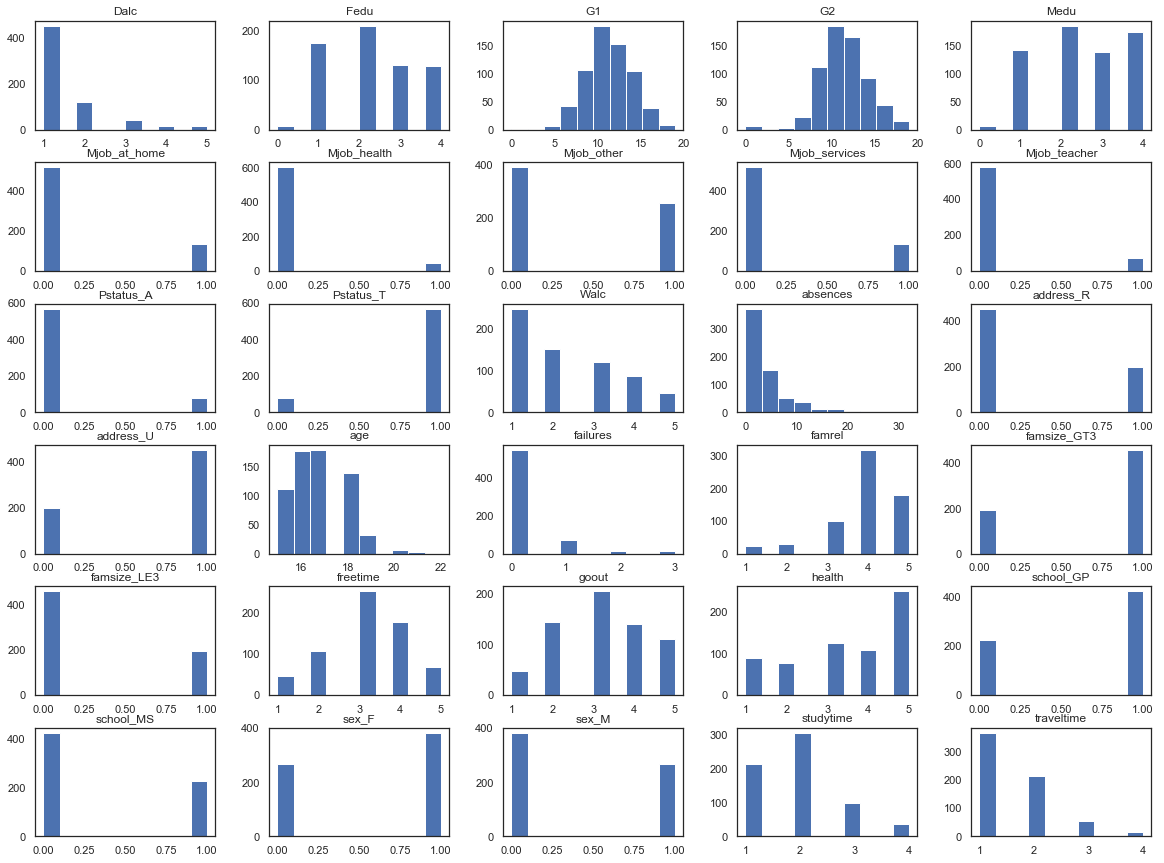

In [13]:
#data_id_diag=data.loc[:,["id","diagnosis"]]
#data_diag=dataset3.loc[:,["G3"]]
#For a merge + slice:
data_mean=Correct_set_new.ix[:,0:30]

#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(20, 15),grid=False,)


## Visualize distribution of data via density plots

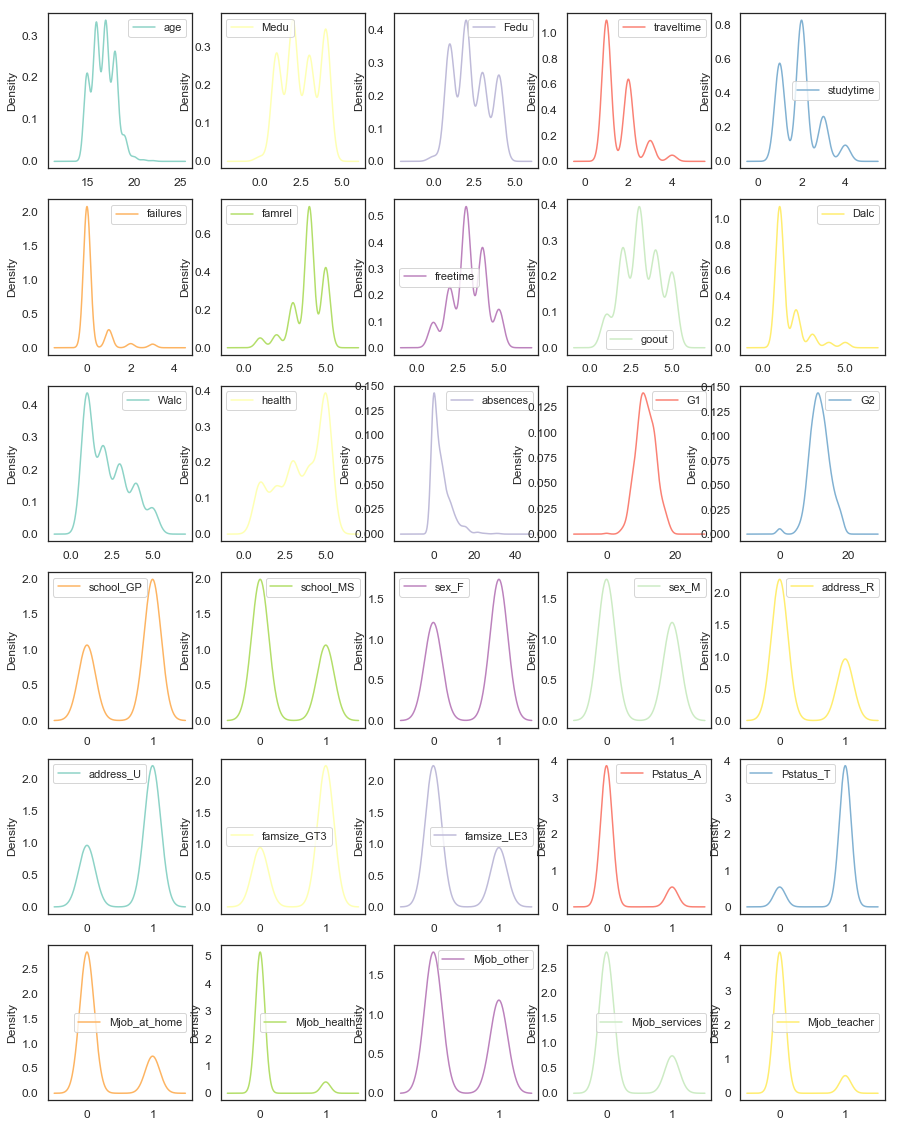

In [49]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(6,5), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,20))

## Visualise distribution of data via box plots

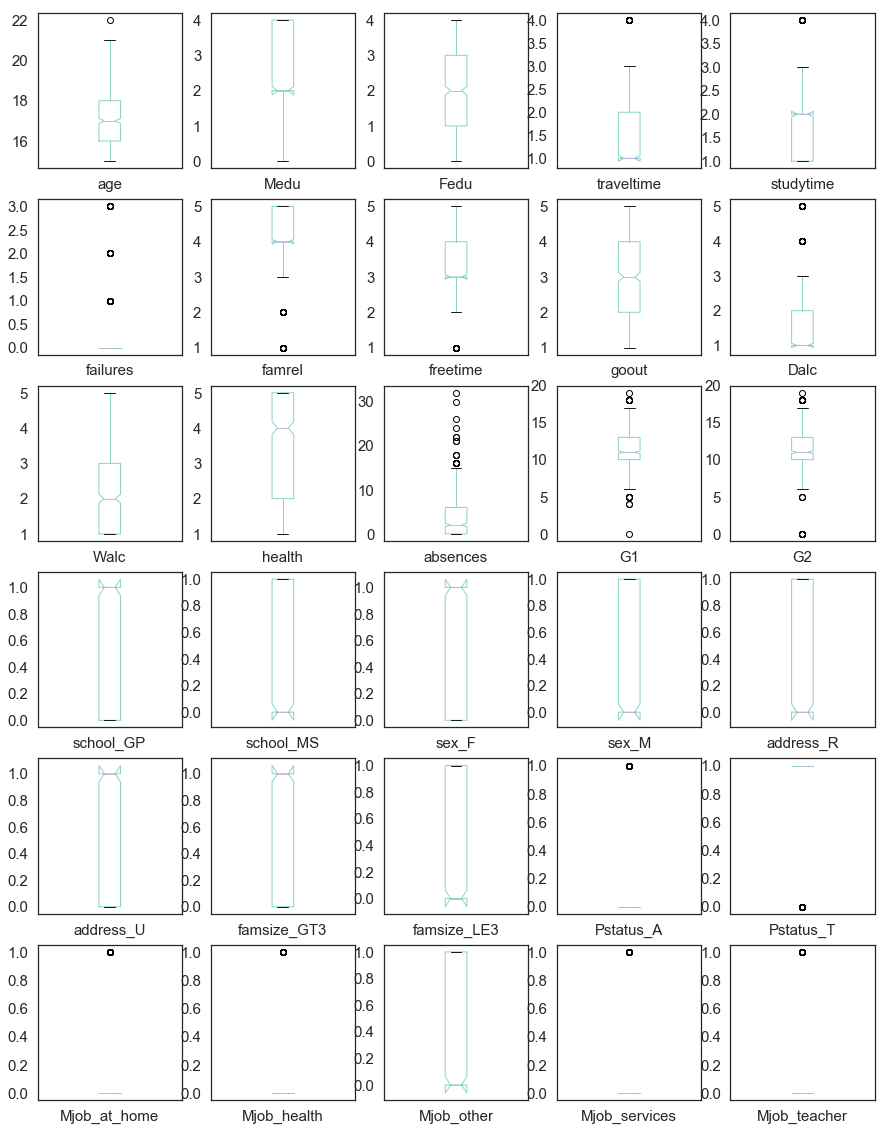

In [50]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(6,5), sharex=False, sharey=False,notch=True, fontsize=15, figsize=(15,20))

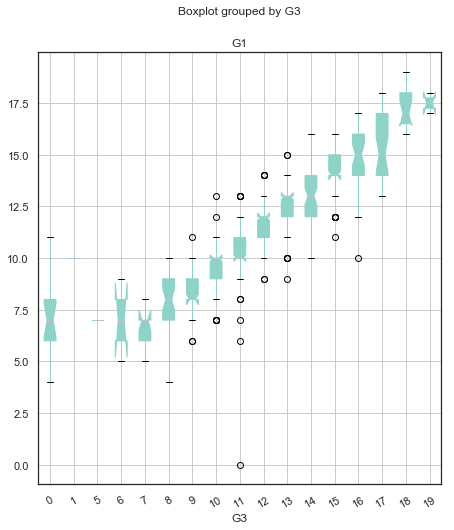

In [52]:
#Age distribution by output G3
dataset3.plot('G1','G3',rot = 30,figsize=(7,8),notch=True , patch_artist=True)


## Correlation Matrix

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


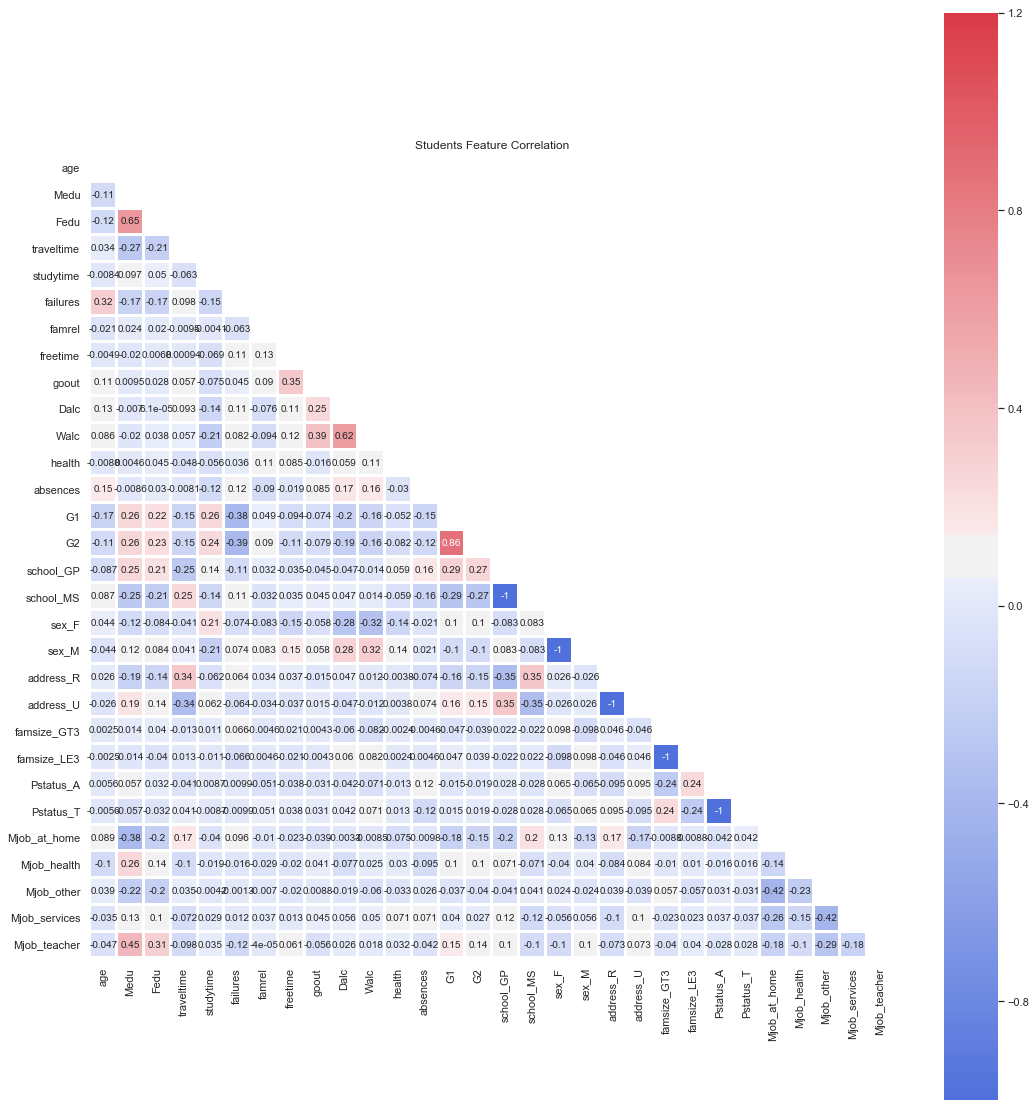

In [53]:
# plot correlation matrix
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.set_style("white")

data_mean=Correct_set_new.ix[:,0:30]
# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
Correct_set_new, ax = plt.subplots(figsize=(18, 20))
plt.title('Students Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

## K-means Clustering Algorithm

#### The code of K-means clustering algorithm is based on the following source:
https://www.datacamp.com/community/tutorials/k-means-clustering-python

##### Split the dataset into training and validation data set

In [112]:
dataset3['G3'] = np.where(dataset3['G3']>=10,0,1)
#We firstly copy the y column 
ytarget=dataset3['G3'].copy()
#We drop out the y attribute
Training_set= dataset3.drop(['G3'], axis=1)

Training_set[Training_set.select_dtypes(['object']).columns].head()

#We can convert now the categorical data by using dummies
Training_set_new = pd.get_dummies(Training_set, columns=Training_set.select_dtypes(['object']).columns)
Training_set_new.select_dtypes(['object']).columns

ytarget.value_counts()
y = ytarget.map({"yes":1, "no":0})



In [113]:
X_train, X_test, y_train, y_test = train_test_split( Training_set_new, y, test_size = 0.20, random_state = 100)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(519, 58) (519,)
(130, 58) (130,)


In [140]:
X = dataset3.drop(['G3'], axis = 1).values
y = dataset3['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((519, 32), (130, 32), (519,), (130,))

In [115]:
from sklearn.cluster import KMeans
n=10
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
#Accuracy score
ac=accuracy_score(y,y_pred_kmeans)*100
print( "\nThe K Mean cluster accuracy score is:", ac)
plt.show()
print("Normalized mutual score is:",normalized_mutual_info_score(y, y_pred_kmeans))
print("Completeness score is:",completeness_score(y, y_pred_kmeans))



The K Mean cluster accuracy score is: 47.14946070878274
Normalized mutual score is: 3.25
Completeness score is: 6.924079782195295e-16


C:\Users\Antri\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


## Design Auto encoder

### Change the middle layer to use softmax features

In [152]:
#Import Libraries
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import tensorflow as tf
from keras import metrics

In [142]:
dataset3['G3'] = np.where(dataset3['G3']>=10,0,1)
#We firstly copy the y column 
ytarget=dataset3['G3'].copy()
#We drop out the y attribute
Training_set= dataset3.drop(['G3'], axis=1)

Training_set[Training_set.select_dtypes(['object']).columns].head()

#We can convert now the categorical data by using dummies
Training_set_new = pd.get_dummies(Training_set, columns=Training_set.select_dtypes(['object']).columns)
Training_set_new.select_dtypes(['object']).columns

ytarget.value_counts()
#y = ytarget.map({"yes":1, "no":0})

X_train, X_test, y_train, y_test = train_test_split( Training_set_new, y, test_size = 0.20, random_state = 100)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(519, 58) (519,)
(130, 58) (130,)


In [143]:
#The autoencoder code is based on the following source:
#https://github.com/rjpg/bftensor/blob/349f0c3aad5e2768e94f4f7b741f5f7ff4328d64/Autoencoder/src/AutoEncoderMNIST.py
num_train = 519
num_test = 130

height, width, depth = 1, 58, 1 # MNIST images are 1x63
num_classes = 10

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels


In [144]:
#Build the Autoencoder
input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img)

encoded = Dense(height * width//2, activation='relu' ,activity_regularizer=regularizers.l1(10e-5))(x)
encoded = Dense(height * width//8, activation='relu')(encoded)

y = Dense(height * width, activation='relu')(x)

decoded = Dense(height * width//8, activation='relu')(y)
decoded = Dense(height * width//2, activation='relu')(decoded)

z = Dense(height * width, activation='sigmoid')(decoded)
model = Model(input_img, z)

In [145]:

model.compile(optimizer='adadelta', loss='mse') # reporting the accuracy

#Normalizing the data
from keras import regularizers
from sklearn import preprocessing
X_train = pd.DataFrame(X_train)#.values)
X_train = preprocessing.MinMaxScaler().fit_transform(X_train.values)


model.fit(X_train, X_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, X_test))


Train on 519 samples, validate on 130 samples
Epoch 1/10
519/519 [==============================] - 1s 3ms/step - loss: 0.2160 - val_loss: 0.2438
Epoch 2/10
519/519 [==============================] - 0s 41us/step - loss: 0.2149 - val_loss: 0.2433
Epoch 3/10
519/519 [==============================] - 0s 37us/step - loss: 0.2139 - val_loss: 0.2427
Epoch 4/10
519/519 [==============================] - 0s 39us/step - loss: 0.2129 - val_loss: 0.2422
Epoch 5/10
519/519 [==============================] - 0s 39us/step - loss: 0.2119 - val_loss: 0.2416
Epoch 6/10
519/519 [==============================] - 0s 41us/step - loss: 0.2109 - val_loss: 0.2410
Epoch 7/10
519/519 [==============================] - 0s 38us/step - loss: 0.2099 - val_loss: 0.2404
Epoch 8/10
519/519 [==============================] - 0s 37us/step - loss: 0.2087 - val_loss: 0.2397
Epoch 9/10
519/519 [==============================] - 0s 36us/step - loss: 0.2074 - val_loss: 0.2390
Epoch 10/10
519/519 [=========================

In [146]:
out = Dense(num_classes, activation='softmax')(y)
reduced = Model(input_img, out)
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

reduced.fit(X_train, Y_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, Y_test))

scores = reduced.evaluate(X_test, Y_test, verbose=1) 


Train on 519 samples, validate on 130 samples
Epoch 1/10
519/519 [==============================] - 1s 3ms/step - loss: 2.1951 - acc: 0.2062 - val_loss: 2.2552 - val_acc: 1.0000
Epoch 2/10
519/519 [==============================] - 0s 35us/step - loss: 1.6048 - acc: 0.9788 - val_loss: 2.2101 - val_acc: 1.0000
Epoch 3/10
519/519 [==============================] - 0s 40us/step - loss: 1.0926 - acc: 1.0000 - val_loss: 2.1551 - val_acc: 1.0000
Epoch 4/10
519/519 [==============================] - 0s 41us/step - loss: 0.6540 - acc: 1.0000 - val_loss: 2.0861 - val_acc: 1.0000
Epoch 5/10
519/519 [==============================] - 0s 40us/step - loss: 0.3242 - acc: 1.0000 - val_loss: 2.0067 - val_acc: 1.0000
Epoch 6/10
519/519 [==============================] - 0s 37us/step - loss: 0.1337 - acc: 1.0000 - val_loss: 1.9275 - val_acc: 1.0000
Epoch 7/10
519/519 [==============================] - 0s 37us/step - loss: 0.0512 - acc: 1.0000 - val_loss: 1.8567 - val_acc: 1.0000
Epoch 8/10
519/519 [====

In [150]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((Y_train, Y_test))

kmeans = KMeans(n_clusters=3, n_init=20)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
print("\nThe K Mean cluster accuracy score using autoencoder(softmax) is: ", score*100)



The K Mean cluster accuracy score using autoencoder(softmax) is:  56.00000000000001
